
## Final Project - History of the Olympics dataframe

This project consists of an analysis of historical data from the olympic games.

Use any of the studied libraries (```matplotlib```, ```seaborn``` and ```plotly```) to carry out the proposed activities. It's okay to use just one for all activities, or to use each one for a different activity - just follow your personal preferences!

Use the (many) parameters allowed by each function and/or object attributes provided by the libraries to create a cohesive visual identity to be used throughout the project. Use titles, legends and labels on the axes to make graphics truly informative. And don't forget that the simple choice of colors to use can make graphics even more interesting!

## Metadata:

The ```athlete_events.csv``` file contains 271116 rows and 15 columns. Each row corresponds to an individual (athlete) who competed in an individual Olympic event. See the description of the 15 columns below:

- **ID:** Unique value for each athlete
- **Name:** Athlete's name
- **Sex:** Athlete's gender (M for male and F for female)
- **Age:** Athlete's age at the time of competition
- **Height:** Height of the athlete, in centimeters
- **Weight:** Athlete's weight, in kg
- **Team:** Team name
- **NOC:** National Olympic Committee (3 letter code)
- **Games:** Year and season of games
- **Year:** Year of games
- **Season:** Game season (summer for summer and winter for winter)
- **City:** City where the games took place
- **Sport:** Sport practiced by the athlete
- **Event:** Competition category/modality
- **Medal:** Acquired Medal: Gold (Gold), Silver (Silver), Bronze or NA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt

## Brazil at the olympics

**1.** Create a DataFrame containing only information about **Brazilian** athletes. Display the number of rows of this new DataFrame.

In [3]:
df = pd.read_csv('./athlete_events.csv')
df_brazil = df[df['Team'] == 'Brazil']

print("Lines new DataFrame:",df_brazil.shape[0])


Lines new DataFrame: 3772


In [4]:
df_brazil.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
665,386,Alexandre Abeid,M,22.0,194.0,92.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Volleyball,Volleyball Men's Volleyball,NaN
666,386,Alexandre Abeid,M,26.0,194.0,92.0,Brazil,BRA,1976 Summer,1976,Summer,Montreal,Volleyball,Volleyball Men's Volleyball,NaN
668,388,Abel Carlos da Silva Braga,M,19.0,190.0,73.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
781,451,Diana Monteiro Abla,F,21.0,175.0,75.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Water Polo,Water Polo Women's Water Polo,NaN
1005,565,Glauclio Serro Abreu,M,26.0,185.0,75.0,Brazil,BRA,2004 Summer,2004,Summer,Athina,Boxing,Boxing Men's Middleweight,NaN


**2. Is there any correlation between the athlete's height and his performance, for any sport? Do this analysis separately for each gender, and conclude.**

Generate one or more graphs of your choice, where you can compare the heights of athletes in each sport, separating them by gender. If necessary, create auxiliary columns or DataFrames.

**Facilitator:** if you want, analyze only the sports in which there are at least 5 medal-winning athletes and 5 non-medalist athletes, to facilitate visualization and conclusions.

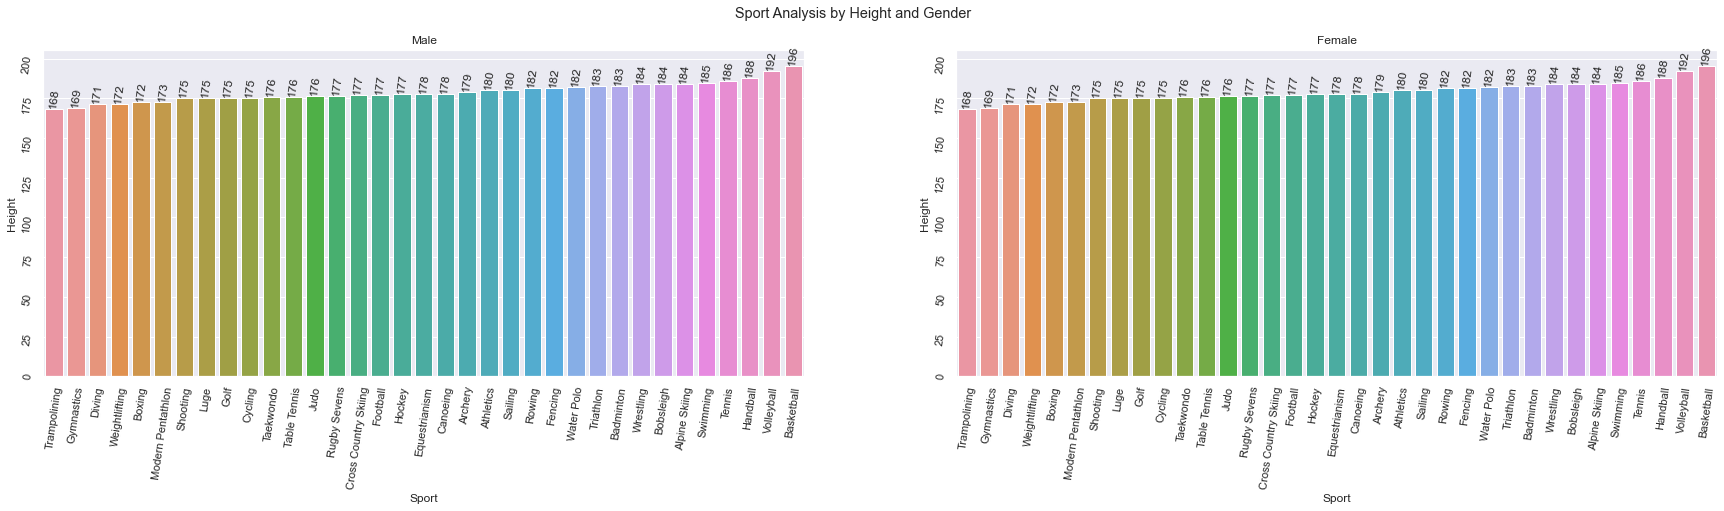

In [13]:

# First we get the mean and then group  by gender

#Male
df_malesport = df_brazil[df_brazil['Sex'] =='M'].groupby(['Sport', 'ID'], as_index=False).mean()
df_malesport = df_malesport.groupby(['Sport'], as_index=False).mean().dropna()


#Female
df_femalesport = df_brazil[df_brazil['Sex'] =='F'].groupby(['Sport', 'ID'], as_index=False).mean()
df_femalesport = df_malesport.groupby(['Sport'], as_index=False).mean()

sns.set(rc={'figure.figsize':(30,6)}) # Sets default size

fig, axes = plt.subplots(1,2)
fig.suptitle('Sport Analysis by Height and Gender');

for x,y in enumerate(('Male', 'Female')):
    
    data_df = df_malesport if x ==0 else df_femalesport # Position 0 == Male, Position 1 == Female
    data_order = data_df.sort_values('Height').Sport # Sort the size in ascending order
    
    sns.barplot(ax=axes[x], x='Sport', y='Height', data=data_df, ci=None, order=data_order)
    axes[x].tick_params(rotation=82)
    axes[x].set_title(y)
    axes[x].bar_label(axes[x].containers[0], fmt='%.0f', rotation=82)


**3. Let's now review the medals our athletes brought home.**

Create a visualization of your choice to show, by sport, the proportion of gold, silver and bronze medals our country has won.

**Facilitator:** If you prefer, show the proportions only for the 6 sports that had the most medals.

*HINT:* Watch out! Team sports give medals to all players, but they only count once!

In [47]:
sport_medals = df_brazil.groupby(['Sport'])['Medal'].value_counts().unstack().fillna(0)
sport_medals

Medal,Bronze,Gold,Silver
Sport,,,
Athletics,14.0,5.0,7.0
Basketball,46.0,0.0,12.0
Boxing,3.0,1.0,1.0
Canoeing,1.0,0.0,3.0
Equestrianism,8.0,1.0,0.0
Football,34.0,17.0,85.0
Gymnastics,1.0,1.0,2.0
Judo,15.0,4.0,3.0
Modern Pentathlon,1.0,0.0,0.0


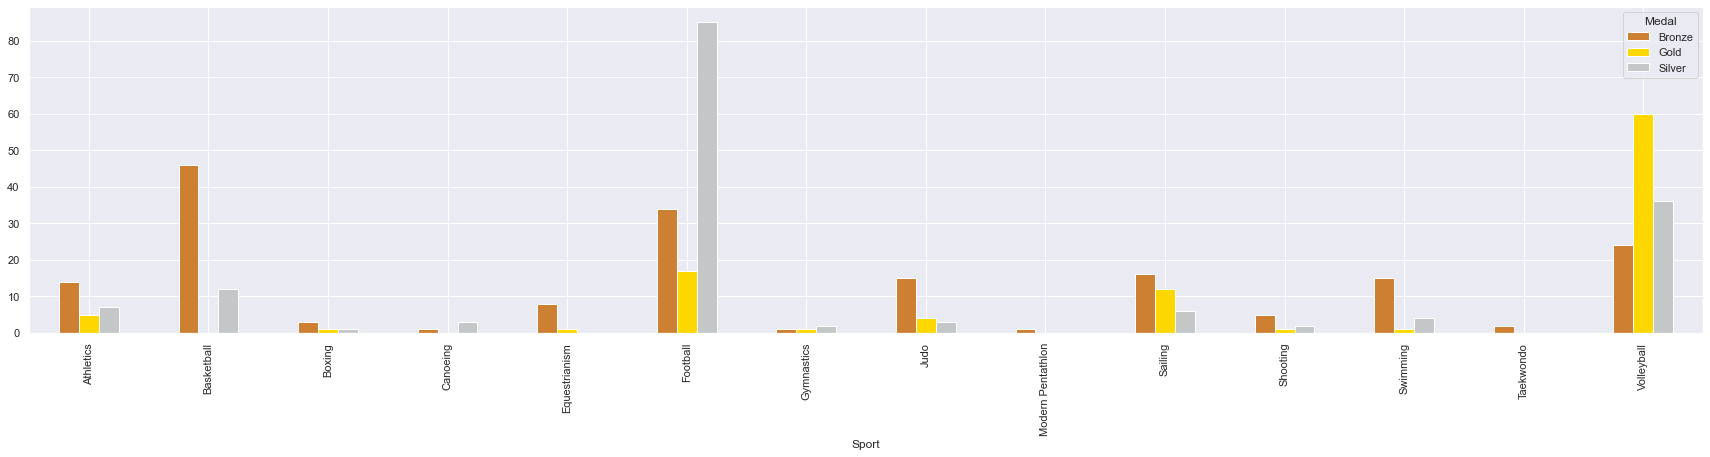

In [45]:
stacked_fig = sport_medals.plot(kind='bar',  color=['#CD7F32' , '#FFD700' , '#C3C7C7'])

**4. To finish the history of Brazil, let's see the time series of Brazilian medals.**

Create a chart of your choice that shows the total number of gold, silver and bronze medals by edition of the Olympics (in chronological order).

*TIP:* Again, beware of group sports - only count them once!

In [37]:
years_medals = df_brazil.groupby(['Year'])['Medal'].value_counts().unstack().fillna(0)
years_medals

Medal,Bronze,Gold,Silver
Year,,,
1920,5.0,1.0,1.0
1948,10.0,0.0,0.0
1952,2.0,1.0,0.0
1956,0.0,1.0,0.0
1960,13.0,0.0,0.0
1964,12.0,0.0,0.0
1968,3.0,0.0,1.0
1972,2.0,0.0,0.0
1976,3.0,0.0,0.0


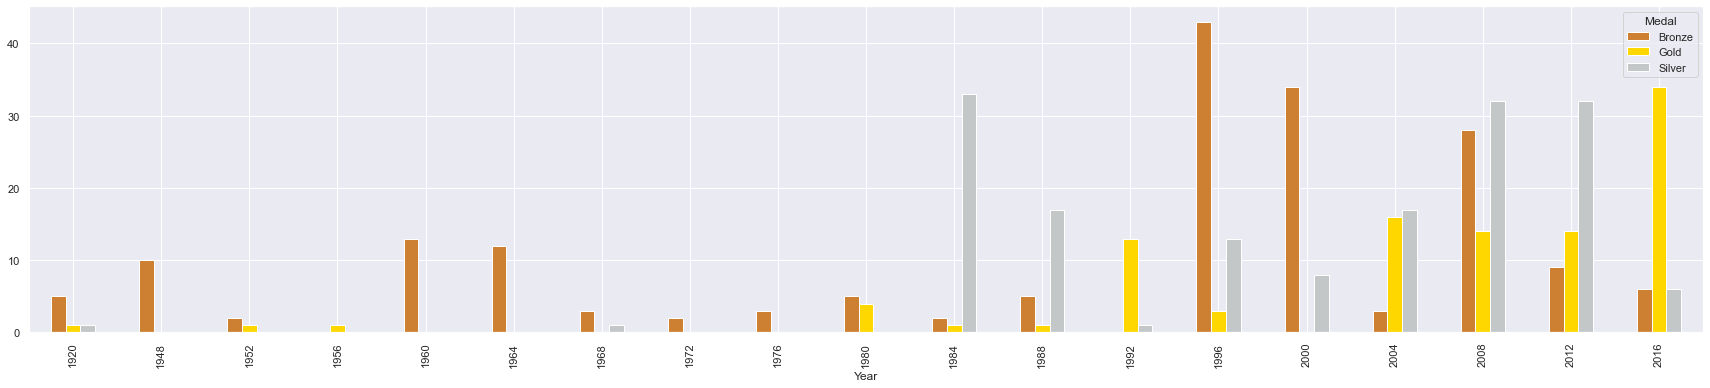

In [38]:
stacked_fig = years_medals.plot(kind='bar',  color=['#CD7F32' , '#FFD700' , '#C3C7C7'])

**5. Now it's up to you!**

Choose a visual analysis that you think is interesting to do in this dataset, make the necessary graph(s) and comment on the results.

In [40]:
df_brazil.isnull().sum()

ID           0
Name         0
Sex          0
Age         59
Height     468
Weight     639
Team         0
NOC          0
Games        0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal     3323
dtype: int64

In [42]:
Medals = df_brazil['Medal'].value_counts()
Medals

Bronze    185
Silver    161
Gold      103
Name: Medal, dtype: int64

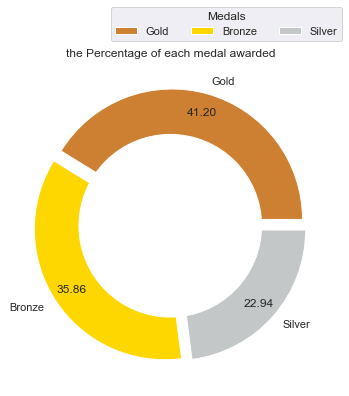

In [43]:
explode = (0.05, 0.05 , 0.05)
color=['#CD7F32' , '#FFD700' , '#C3C7C7']
plt.pie(Medals , labels = ['Gold' , 'Bronze' , 'Silver'] , autopct="%.2f" , explode = explode, pctdistance=0.85 , colors = color)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)
plt.legend(title = 'Medals' , bbox_to_anchor =(0.30, 1.05), ncol = 3 , loc = 'lower left')
plt.title('the Percentage of each medal awarded' , loc = 'center');